# Data Analysis

### Import Libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the Dataset

In [2]:
df = pd.read_csv("data/team_stats_2003_2023.csv")

## Data Exploration

1. Structure of the data set

In [4]:
df.shape

df.head(10)

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,...,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,...,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,...,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,...,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,...,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN
5,2003,Cincinnati Bengals,8,8,0.500,346,384,-38,-2.4,16,...,12,4.1,101,107,846,31,33.3,11.1,-78.22,NaN
6,2003,Pittsburgh Steelers,6,10,0.375,300,327,-27,-1.7,16,...,10,3.3,77,111,1005,24,27.1,13.5,-166.93,NaN
7,2003,Cleveland Browns,5,11,0.313,254,322,-68,-4.3,16,...,8,4.1,91,98,767,32,26.7,17.2,-191.88,NaN
8,2003,Indianapolis Colts,12,4,0.750,447,336,111,6.9,16,...,16,3.7,104,92,662,32,46.3,10.2,-13.96,NaN
9,2003,Tennessee Titans,12,4,0.750,435,324,111,6.9,16,...,11,3.3,84,110,887,15,39.4,9.6,-103.79,NaN


2. Check for Null Values

In [5]:
df.isna().sum()

year                      0
team                      0
wins                      0
losses                    0
win_loss_perc             0
points                    0
points_opp                0
points_diff               0
mov                     320
g                         0
total_yards               0
plays_offense             0
yds_per_play_offense      0
turnovers                 0
fumbles_lost              0
first_down                0
pass_cmp                  0
pass_att                  0
pass_yds                  0
pass_td                   0
pass_int                  0
pass_net_yds_per_att      0
pass_fd                   0
rush_att                  0
rush_yds                  0
rush_td                   0
rush_yds_per_att          0
rush_fd                   0
penalties                 0
penalties_yds             0
pen_fd                    0
score_pct                 0
turnover_pct              0
exp_pts_tot               0
ties                    352
dtype: int64

## Data Cleaning

It seems like only have two columns with null values, mov, and ties. As I don't intend to use data from either of these columns, I will drop them.

In [11]:
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  672 non-null    int64  
 1   team                  672 non-null    object 
 2   wins                  672 non-null    int64  
 3   losses                672 non-null    int64  
 4   win_loss_perc         672 non-null    float64
 5   points                672 non-null    int64  
 6   points_opp            672 non-null    int64  
 7   points_diff           672 non-null    int64  
 8   g                     672 non-null    int64  
 9   total_yards           672 non-null    int64  
 10  plays_offense         672 non-null    int64  
 11  yds_per_play_offense  672 non-null    float64
 12  turnovers             672 non-null    int64  
 13  fumbles_lost          672 non-null    int64  
 14  first_down            672 non-null    int64  
 15  pass_cmp              6

There really isn't much cleaning needed here, all strings are properly formatted, I have removed all null values, and each entry is a seperate team or season so duplicates aren't a problem.

## Exploratory Data Analysis

### 1. Shape

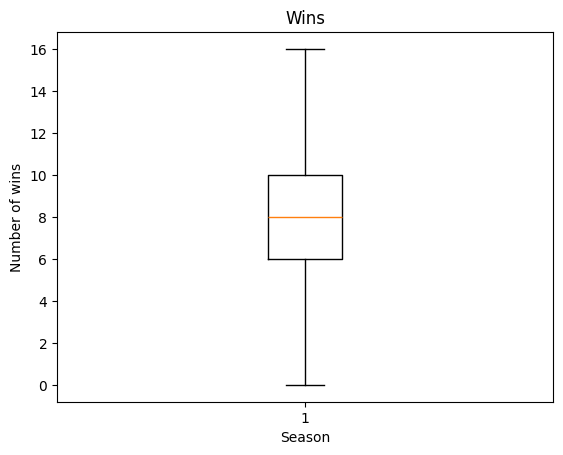

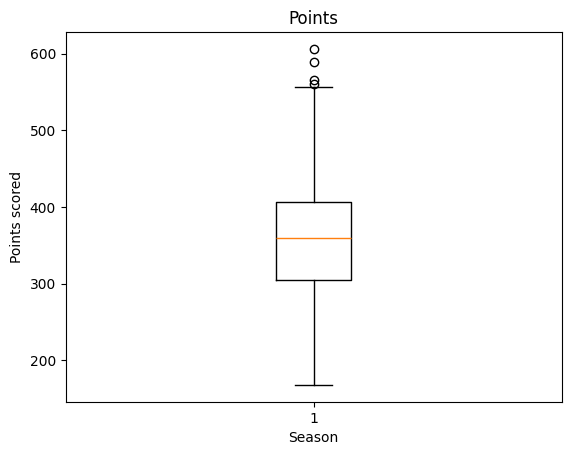

In [44]:
# Shape of the Wins Collumn
plt.boxplot(df["wins"])
plt.title("Wins")
plt.xlabel("Season")
plt.ylabel("Number of wins")
plt.show()

# Shape of the Points Collumn
plt.boxplot(df["points"])
plt.title("Points")
plt.xlabel("Season")
plt.ylabel("Points scored")
plt.show()

The data for points and wins seems to be in order, there are no outliers for the wins collumn, and only a few in the points collumn, but the data is accurate (The 2013 Broncos did score 606 points in one season), no reason to modify the data.

## Wins

In [54]:
# General distribution data for the wins collumn
data = {}
data["mean"] = df["wins"].mean()
data["mode"] = df["wins"].mode()
data["median"] = df["wins"].median()
data["max"] = df["wins"].max()
data["min"] = df["wins"].min()
data["std"] = df["wins"].std()
data["range"] = df["wins"].max() - df["wins"].min()

print(data)



{'mean': 8.050595238095237, 'mode': 0    7
Name: wins, dtype: int64, 'median': 8.0, 'max': 16, 'min': 0, 'std': 3.0932549479042892, 'range': 16}


# Statistical Analysis

## Question 1: Which teams have the most and least wins overall?

In [62]:
total_wins = {}

def find_wins(name) :
    new = df.loc[df["team"] == name]
    total_wins[name] = new["wins"].sum()

teams_arr = df.loc[df["year"] == 2003]
for i in teams_arr["team"] :
    find_wins(i)


max = "New England Patriots"
for i in total_wins :
    if total_wins[i] > total_wins[max]:
        max = i


min = "New England Patriots"
for i in total_wins :
    if total_wins[i] < total_wins[max]:
        max = i

print(max)
print(total_wins[max])
print(min)
print(total_wins[min])



St. Louis Rams
76
New England Patriots
241


The team with the most wins since 2003 has been the New England Patriots with 241, and the least successful as been the St. Louis Rams with 76 Wins

# Question 2: Which teams have been the most and least successful in points

In [63]:
total_points = {}

def find_points(name) :
    new = df.loc[df["team"] == name]
    total_points[name] = new["points"].sum()

teams_arr = df.loc[df["year"] == 2003]
for i in teams_arr["team"] :
    find_points(i)


max = "New England Patriots"
for i in total_points :
    if total_points[i] > total_points[max]:
        max = i


min = "New England Patriots"
for i in total_wins :
    if total_points[i] < total_points[max]:
        max = i

print(max)
print(total_points[max])
print(min)
print(total_points[min])

St. Louis Rams
3899
New England Patriots
9083


While it makes some sense that the teams with the most and least wins would be the same as the teams with the most and least points, I found it kind of suprising. The team with the least points was the St. Louis Rams with 3899, and the team with the most points was the Patriots with 9083.

# Question 3: Which 